In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Conv1D, LSTM, Dense, Attention, GlobalMaxPooling1D, Bidirectional, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# load the tweets dataset
df_tweets = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/propaganda/finalAugResults/augOriginalDS/augOriginal.csv')
# load the test dataset
df_tweets_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/propaganda/testDS.csv')
# load the validation dataset
df_tweets_val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/propaganda/task2_dev.csv')


In [ ]:
df_tweets

,Unnamed: 0.1,Unnamed: 0,start,end,technique,text,full_text,id,start_new,end_new,augmented_text,augmented_full_text
0,0,0,0,0,no technique,NaN,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...,1358824915483435012,0.0,0.0,NaN,بي بي سي ترندينغ النساء تثرثر كثيرا رئيس أولمب...
1,1,1,1,33,Exaggeration/Minimisation,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,0.0,32.0,ده مش معتقل ده أحسن من اللوكاندة,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...
2,2,2,37,86,Smears,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...,1389927866356412416,33.0,82.0,جدل وسخرية من زيارات تنظمها وزارة الداخلية للسجون,ده مش معتقل ده أحسن من اللوكاندة جدل وسخرية من...
3,3,3,0,0,no technique,NaN,الرجل الذي كان من فراغ,1364082975428677632,0.0,0.0,NaN,الرجل الذي كان من فراغ
4,4,4,60,72,Loaded Language,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...,1391667689656102914,40.0,52.0,مجزرة حقيقية,عاجل حركة حماس ما يجري في المسجد الأقصى مجزرة ...
...,...,...,...,...,...,...,...,...,...,...,...,...
5343,5375,6055,19,82,Appeal to fear/prejudice,انتشال ضحايا من عائلة كاملة قصف منزلها في شمال...,مراسلة فرانس انتشال ضحايا من عائلة كاملة قصف م...,1393098908218269697,13.0,74.0,انتشال ضحايا من عائلة كاملة قصف منزلها في شمال...,مراسلة فرانس انتشال ضحايا من عائلة كاملة قصف م...
5344,5376,3655,9,44,Appeal to fear/prejudice,حدث خطير في فلسطين يتطلب إرسال قوات,باكستان حدث خطير في فلسطين يتطلب إرسال قوات,7331,8.0,43.0,حدث خطير في باكستان يتطلب إرسال قوات,باكستان حدث خطير في باكستان يتطلب إرسال قوات
5345,5377,2401,0,73,Appeal to fear/prejudice,أكثر من ألف وفاة في البرازيل وسط تحذيرات من مو...,أكثر من ألف وفاة في البرازيل وسط تحذيرات من مو...,7283,0.0,67.0,أكثر من ألف وفاة في أذربيجان وسط تحذيرات من مو...,أكثر من ألف وفاة في أذربيجان وسط تحذيرات من مو...
5346,5378,6143,19,82,Appeal to fear/prejudice,انتشال ضحايا من عائلة كاملة قصف منزلها في شمال...,مراسلة فرانس انتشال ضحايا من عائلة كاملة قصف م...,1393098908218269697,13.0,74.0,انتشال ضحايا من عائلة كاملة قصف منزلها في شمال...,مراسلة فرانس انتشال ضحايا من عائلة كاملة قصف م...


In [ ]:
df_tweets['technique'].value_counts()

,count
technique,
"Obfuscation, Intentional vagueness, Confusion",477
Exaggeration/Minimisation,462
Loaded Language,446
Name calling/Labeling,443
Flag-waving,421
Whataboutism,405
Appeal to authority,386
Black-and-white Fallacy/Dictatorship,348
no technique,345


In [ ]:

df_tweets.drop(columns=["Unnamed: 0", "start", "end","text", "start_new","end_new"], inplace=True)

#df_tweets_test['augmented_text'] = df_tweets_test['text']
#df_tweets_test.drop(columns=["start", "end","Unnamed: 0", "text", "start_new","end_new"], inplace=True)

df_tweets_val['augmented_text'] = df_tweets_val['text']
df_tweets_val['augmented_full_text'] = df_tweets_val['full_text']
df_tweets_val.drop(columns=["start", "end","Unnamed: 0", "text", "start_new","end_new"], inplace=True)


df_all_tweets_list = [df_tweets,df_tweets_val]
df_all_tweets = pd.concat(df_all_tweets_list)


# First group tags Id wise
df_tags = df_all_tweets[['technique','augmented_full_text', 'augmented_text']]
classes = df_tags['technique'].unique()

'''
df_tags = df_tags.drop_duplicates(subset=['technique','augmented_full_text'], ignore_index = True)
df_tags = df_tags.groupby('augmented_full_text').apply(lambda x:x['technique'].values).reset_index(name='techniques')
'''

# Group by 'augmented_full_text' and aggregate 'technique' and 'augmented_text' as lists
grouped_df = df_tags.groupby('augmented_full_text').agg({
    'technique': list,
    'augmented_text': list
}).reset_index()

'''
# Define a regular expression pattern to match non-Arabic characters
non_arabic_pattern = r'[^\u0600-\u06FF\s]'

# Remove non-Arabic characters using the regular expression pattern
df_tags['augmented_full_text'] = df_tags['augmented_full_text'].str.replace(non_arabic_pattern, '', regex=True)

df_tags.shape
'''
df_new = grouped_df
df_new

,augmented_full_text,technique,augmented_text
0,(بداية برنامج ترويج الارهابيين يا (شار يستبق ا...,[Smears],[(بداية برنامج ترويج الارهابيين يا (شار]
1,(بشار الأسد) دنس دائماً لينتخب نفسه,[Smears],[(بشار الأسد) دنس دائماً لينتخب نفسه]
2,(ترامب) يتهم رئيس كوريا الجنوبية بنهب الولايات...,[Smears],[(ترامب) يتهم رئيس كوريا الجنوبية بنهب الولايا...
3,- الانتصار على القصف الإسرائيلي أمام قبة قاسم ...,[Smears],[- الانتصار على القصف الإسرائيلي أمام قبة قاسم...
4,-الحارس. يقتلون بالسكاكين والمناجل في شرق الكو...,[Name calling/Labeling],[-الحارس.]
...,...,...,...
4741,يوم النصر إصرار عنبرة وبناء,[no technique],[nan]
4742,٢٥ أيار عدد المتظاهرات في العراق ترفع شعار من ...,[Exaggeration/Minimisation],[عدد المتظاهرات]
4743,٢٥ أيار مظاهرات حاشدة في العراق ترفع شعار من ق...,[Flag-waving],[المطالبة بمحاسبة المسؤولين عن اغتيال النشطاء ...
4744,٢٥ أيار مظاهرات حاشدة في العراق ترفع شعار من ق...,"[Loaded Language, Slogans, Flag-waving, Loaded...","[من قتلني, من قتلني, مطالبة بمحاسبة المسؤولين ..."


In [ ]:
classes

array(['no technique', 'Exaggeration/Minimisation', 'Smears',
       'Loaded Language', 'Appeal to fear/prejudice',
       'Name calling/Labeling', 'Slogans', 'Repetition', 'Doubt',
       'Obfuscation, Intentional vagueness, Confusion', 'Flag-waving',
       'Glittering generalities (Virtue)',
       'Presenting Irrelevant Data (Red Herring)', 'Appeal to authority',
       'Whataboutism', 'Black-and-white Fallacy/Dictatorship',
       'Thought-terminating cliché', 'Causal Oversimplification'],
      dtype=object)

In [ ]:
df_new

,augmented_full_text,technique,augmented_text
0,(بداية برنامج ترويج الارهابيين يا (شار يستبق ا...,[Smears],[(بداية برنامج ترويج الارهابيين يا (شار]
1,(بشار الأسد) دنس دائماً لينتخب نفسه,[Smears],[(بشار الأسد) دنس دائماً لينتخب نفسه]
2,(ترامب) يتهم رئيس كوريا الجنوبية بنهب الولايات...,[Smears],[(ترامب) يتهم رئيس كوريا الجنوبية بنهب الولايا...
3,- الانتصار على القصف الإسرائيلي أمام قبة قاسم ...,[Smears],[- الانتصار على القصف الإسرائيلي أمام قبة قاسم...
4,-الحارس. يقتلون بالسكاكين والمناجل في شرق الكو...,[Name calling/Labeling],[-الحارس.]
...,...,...,...
4741,يوم النصر إصرار عنبرة وبناء,[no technique],[nan]
4742,٢٥ أيار عدد المتظاهرات في العراق ترفع شعار من ...,[Exaggeration/Minimisation],[عدد المتظاهرات]
4743,٢٥ أيار مظاهرات حاشدة في العراق ترفع شعار من ق...,[Flag-waving],[المطالبة بمحاسبة المسؤولين عن اغتيال النشطاء ...
4744,٢٥ أيار مظاهرات حاشدة في العراق ترفع شعار من ق...,"[Loaded Language, Slogans, Flag-waving, Loaded...","[من قتلني, من قتلني, مطالبة بمحاسبة المسؤولين ..."


In [ ]:
# Define necessary hyperparameters
MAX_NUM_WORDS = 10000  # Maximum number of words to keep in the tokenizer (vocabulary size)
max_seq_length = 50  # Maximum length of sequences after padding
embedding_dim = 100  # Size of the embedding vectors
num_classes = len(classes)  # Adjust according to your number of classes for multi-label classification
num_classes

18

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow as tf

# Custom Attention Layer
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]),
                                 initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],),
                                 initializer="zeros", trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.activations.tanh(tf.tensordot(x, self.W, axes=(2, 0)) + self.b)
        a = tf.keras.activations.softmax(e, axis=1)
        output = tf.reduce_sum(x * a, axis=1)
        return output


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Fit and transform labels using MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes = classes)

labels = df_new['technique'].tolist()

labels_encoded = mlb.fit_transform(labels)

In [ ]:
labels_encoded[0]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
x = df_new['augmented_full_text'].values
y = labels_encoded

# for test dataset

In [ ]:

# First group tags Id wise
df_tweets_test['augmented_full_text'] = df_tweets_test['full_text']
#df_tweets_test.drop(columns=["start", "end","Unnamed: 0", "text", "start_new","end_new"], inplace=True)
test_tags = df_tweets_test[['technique','augmented_full_text']]
test_classes = test_tags['technique'].unique()
test_tags = test_tags.drop_duplicates(subset=['technique','augmented_full_text'], ignore_index = True)
test_tags = test_tags.groupby('augmented_full_text').apply(lambda x:x['technique'].values).reset_index(name='technique')


# Define a regular expression pattern to match non-Arabic characters
non_arabic_pattern = r'[^\u0600-\u06FF\s]'

# Remove non-Arabic characters using the regular expression pattern
test_tags['augmented_full_text'] = test_tags['augmented_full_text'].str.replace(non_arabic_pattern, '', regex=True)


test_labels = test_tags['technique'].tolist()

test_labels_encoded = mlb.fit_transform(test_labels)

#df_tweets_test['augmented_text'] = df_tweets_test['text']
#df_tweets_test.drop(columns=["start", "end","Unnamed: 0", "full_text" , "text", "start_new","end_new"], inplace=True)


<ipython-input-14-cea43e885653>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_tags = test_tags.groupby('augmented_full_text').apply(lambda x:x['technique'].values).reset_index(name='technique')


In [ ]:

x_ts = test_tags['augmented_full_text'].values
y_ts = test_labels_encoded


In [ ]:
x_ts

array(['أربعة قتلى خلال تبادل لإطلاق النار بين الشرطة وإرهابيين وسط غرب تونس مصدر أمني',
       'أول دولة أوروبية تصنف الاستيطان الإسرائيلي كاحتلال عين ليبيا',
       'إفريقيا من منظمة الوحدة إلى الاتحاد',
       'إيطاليا ارتفاع حصيلة ضحايا حادث تحطم قاطرة تلفريك إلى قتيلا',
       'الأمم المتحدة السيد هلال يندد ب الارتباط الإيديولوجي و العمى السياسي لجنوب إفريقيا حول الصحراء المغربية',
       'الاقتصاد الأخضر وتحدياته محور ندوة بالرباط',
       'الباحث السياسي عز الدين عقيل مجموعة فاغنر التي تقاتل مع قوات الكرامة قد يخططون لانقلاب على حفتر داخل الرجمة خاصة أن الوضع محتقن بسبب هزيمة عقيلة صالح ليبيا',
       'الحملة الإعلامية الإسبانية ضد المغرب الحديث عن ضعف التنمية في المملكة ينم عن تصورات قديمة لدى الجار الشمالي فالمغرب حقق نسب نمو مطردة رغم الأزمة',
       'الحوار الاجتماعي الحكومة أوفت بكل التزاماتها رغم تداعيات الأزمة الصحية',
       'السعيدية فتح بحث قضائي لتحديد المتورطين في محاولة تهريب أربعة أطنان و كيلوغرام من مخدر الشيرا عبر المسالك البحرية',
       'الصحراء المغربية أي تصر

In [ ]:

from sklearn.model_selection import train_test_split

# Define your random seed
RANDOM_SEED = 42

# First, split into training + validation and test sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

# Then, split the training + validation set into training and validation sets
#x_train_val, x_val, y_train_val, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=RANDOM_SEED)



#x_val,x_ts,y_val,y_ts = train_test_split(X_test, y_test, test_size=0.8, random_state=RANDOM_SEED,shuffle=True)

In [ ]:
!pip install stanza


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 33.7 MB/s eta 0:00:00


In [ ]:
import stanza
stanza.download('ar')  # Download the Arabic model

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ar (Arabic) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ar/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize Keras Tokenizer
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token='<OOV>')
# Fit the tokenizer on the training data
tokenizer.fit_on_texts(x_train)

# Load Stanza pipeline for Arabic
nlp = stanza.Pipeline('ar', processors='tokenize,pos,ner')
import numpy as np


def get_pos_ner_features_stanza(texts):
    pos_features = []
    ner_features = []
    for text in texts:
        doc = nlp(text)
        pos_tags = [word.upos for sent in doc.sentences for word in sent.words]  # POS tags
        entities = [ent.type for ent in doc.ents]  # NER tags
        pos_features.append(pos_tags)
        ner_features.append(entities)
    return pos_features, ner_features

# Get POS and NER features for your training, validation, and test sets
pos_train, ner_train = get_pos_ner_features_stanza(x_train)
pos_val, ner_val = get_pos_ner_features_stanza(x_val)
pos_test, ner_test = get_pos_ner_features_stanza(x_ts)

# Tokenize POS + NER features (Ensure tokenizer is defined as earlier)
pos_train_sequences = tokenizer.texts_to_sequences(pos_train)
ner_train_sequences = tokenizer.texts_to_sequences(ner_train)
pos_val_sequences = tokenizer.texts_to_sequences(pos_val)
ner_val_sequences = tokenizer.texts_to_sequences(ner_val)
pos_test_sequences = tokenizer.texts_to_sequences(pos_test)
ner_test_sequences = tokenizer.texts_to_sequences(ner_test)

# Padding the sequences (same max length as text sequences)
pos_train_padded = pad_sequences(pos_train_sequences, maxlen=max_seq_length, padding='post')
ner_train_padded = pad_sequences(ner_train_sequences, maxlen=max_seq_length, padding='post')
pos_val_padded = pad_sequences(pos_val_sequences, maxlen=max_seq_length, padding='post')
ner_val_padded = pad_sequences(ner_val_sequences, maxlen=max_seq_length, padding='post')
pos_test_padded = pad_sequences(pos_test_sequences, maxlen=max_seq_length, padding='post')
ner_test_padded = pad_sequences(ner_test_sequences, maxlen=max_seq_length, padding='post')

# Convert the text to sequences
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_ts)
val_sequences = tokenizer.texts_to_sequences(x_val)

# Pad sequences to ensure equal length
train_inputs = pad_sequences(train_sequences, maxlen=max_seq_length, padding='post')
test_inputs = pad_sequences(test_sequences, maxlen=max_seq_length, padding='post')
val_inputs = pad_sequences(val_sequences, maxlen=max_seq_length, padding='post')

# Concatenate the padded POS and NER features with the text sequences
train_inputs_combined = np.concatenate([train_inputs, pos_train_padded, ner_train_padded], axis=1)
val_inputs_combined = np.concatenate([val_inputs, pos_val_padded, ner_val_padded], axis=1)
test_inputs_combined = np.concatenate([test_inputs, pos_test_padded, ner_test_padded], axis=1)



INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ar (Arabic):
| Processor | Package      |
----------------------------
| tokenize  | padt         |
| mwt       | padt         |
| pos       | padt_charlm  |
| ner       | aqmar_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.10/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loade

In [ ]:
 x_train.shape

(3796,)

In [ ]:
x_ts.shape , x_val.shape , x_train.shape

((53,), (950,), (3796,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout

def create_cnn_lstm_attention_model():
    model = Sequential()
    model.add(Embedding(input_dim=MAX_NUM_WORDS, output_dim=embedding_dim, input_length=max_seq_length))
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(64, return_sequences=True))
    model.add(Attention())  # Adding Attention Layer here
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='sigmoid'))
    return model

cnn_lstm_attention_model = create_cnn_lstm_attention_model()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
import pathlib
import shutil
import tempfile

logdir = '/content/drive/MyDrive/Colab Notebooks/propaganda/tensorboard_logs_new'
shutil.rmtree(logdir, ignore_errors=True)

checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/propaganda/training_2/cp-{epoch:04d}.weights.h5"

In [ ]:

def get_callbacks(name, steps_per_epoch):
    return [
        tfdocs.modeling.EpochDots(),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50),
        tf.keras.callbacks.TensorBoard(logdir+'/'+name),
        tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            save_freq=steps_per_epoch * 100  # Save every 100 epochs
        )
    ]



In [ ]:
len(classes)

18

In [ ]:
import tensorflow as tf
# Optimizer, loss function, and metrics


# Define the learning rate
LEARNING_RATE = 0.001  # You can adjust this value as needed

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
loss = 'binary_crossentropy'
accuracy = tf.keras.metrics.CategoricalAccuracy()


In [ ]:
# Define training hyperparameters
EPOCHS = 100  # Number of epochs to train the model
BATCH_SIZE = 128  # Number of samples per gradient update
STEPS_PER_EPOCH = len(x_train) // BATCH_SIZE  # Number of batches per epoch

In [ ]:
# Function to compile and fit the CNN-LSTM model
def compile_and_fit(model_name, optimizer, loss_fn, accuracy, name, epochs_num, batch_size, steps_per_epoch):
    # Compile the model
    model_name.compile(optimizer=optimizer,
                       loss=loss_fn,
                       metrics=[
                           tf.keras.metrics.BinaryCrossentropy(
                               from_logits=False, name='binary_crossentropy'),
                           'accuracy'
                       ]
                       )

    model_name.summary()  # Display the model architecture



    # Make sure you're only passing token IDs for CNN-LSTM
    history = model_name.fit(train_inputs_combined, y_train,  # Ensure train_inputs contains only token IDs
                             validation_data=(val_inputs_combined, y_val),  # Ensure val_inputs contains only token IDs
                             epochs=epochs_num,
                             batch_size=batch_size,
                             steps_per_epoch=steps_per_epoch,
                             callbacks=get_callbacks(name, steps_per_epoch),
                             verbose=1)

    return history



In [ ]:
size_histories = {}

In [ ]:

!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-k_m99vxz
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-k_m99vxz
  Resolved https://github.com/tensorflow/docs to commit 15e96c3ee154d7c10ec9bb807ef44b4e6f08e65b
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.10.14.18741-py3-none-any.whl size=182607 sha256=8595ff22c5c445c2b998673aaa54708538c546e503bdf4e39875287a17e5d32b
  Stored in directory: /tmp/pip-ephem-wheel-cache-im3erzxp/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
# Compile and train the CNN-LSTM model
size_histories['ORIGINAL'] = compile_and_fit(cnn_lstm_attention_model, optimizer, loss, accuracy, 'ORIGINAL', EPOCHS, BATCH_SIZE, STEPS_PER_EPOCH)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention (Attention)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.0441 - binary_crossentropy: 0.5180 - loss: 0.5180
Epoch: 0, accuracy:0.0544,  binary_crossentropy:0.3944,  loss:0.3944,  val_accuracy:0.0884,  val_binary_crossentropy:0.2303,  val_loss:0.2303,  
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 429ms/step - accuracy: 0.0444 - binary_crossentropy: 0.5139 - loss: 0.5139 - val_accuracy: 0.0884 - val_binary_crossentropy: 0.2303 - val_loss: 0.2303
Epoch 2/100
 1/29 ━━━━━━━━━━━━━━━━━━━━ 6s 215ms/step - accuracy: 0.0952 - binary_crossentropy: 0.2798 - loss: 0.2798

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0952 - binary_crossentropy: 0.2798 - loss: 0.2798 - val_accuracy: 0.0884 - val_binary_crossentropy: 0.2299 - val_loss: 0.2299
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 445ms/step - accuracy: 0.0735 - binary_crossentropy: 0.2636 - loss: 0.2636 - val_accuracy: 0.0884 - val_binary_crossentropy: 0.2242 - val_loss: 0.2242
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.1190 - binary_crossentropy: 0.2455 - loss: 0.2455 - val_accuracy: 0.0884 - val_binary_crossentropy: 0.2241 - val_loss: 0.2241
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 450ms/step - accuracy: 0.0666 - binary_crossentropy: 0.2470 - loss: 0.2470 - val_accuracy: 0.1579 - val_binary_crossentropy: 0.2220 - val_loss: 0.2220
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0952 - binary_crossentropy: 0.2307 - loss: 0.2307 - val_accuracy: 0.1568 - val_binary_crossentropy: 0.2219 - val_loss: 0.2219
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 483ms

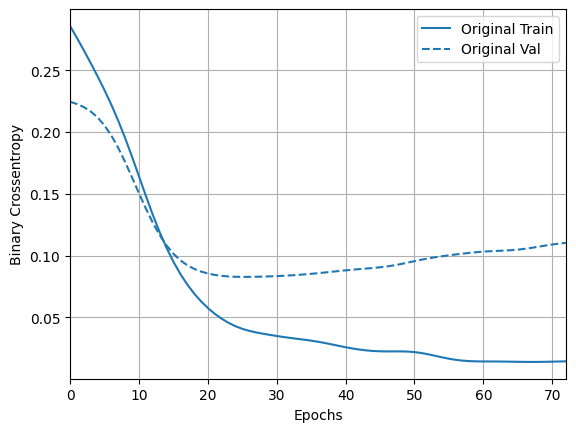

In [ ]:

plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)

#plt.ylim([-1, 2])


In [ ]:
# Assuming you have defined your test inputs as test_inputs and your true labels as y_ts
test_scores = cnn_lstm_attention_model.predict(test_inputs_combined)  # Use cnn_lstm_model instead of model
test_pred_labels = (test_scores >= 0.5).astype(int)
test_true_labels = y_ts.astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 496ms/step


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score,classification_report

# Calculate F1 score
f1_macro = f1_score(test_true_labels, test_pred_labels, average='macro')
f1_micro = f1_score(test_true_labels, test_pred_labels, average='micro')

# Calculate confusion matrix, accuracy, and recall
confusion_mat = confusion_matrix(test_true_labels.flatten(), test_pred_labels.flatten())
accuracy = accuracy_score(test_true_labels.flatten(), test_pred_labels.flatten())
recall = recall_score(test_true_labels.flatten(), test_pred_labels.flatten(), average='macro')
classification_rep = classification_report(test_true_labels.flatten(), test_pred_labels.flatten())

from sklearn import metrics

print("Classification Report:")
print(classification_rep)
print("F1 macro score:", f1_macro)
print("F1 micro score:", f1_micro)
print("Confusion Matrix:")
print(confusion_mat)
print("Accuracy:", accuracy)
print("Recall:", recall)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       827
           1       0.97      0.67      0.79       127

    accuracy                           0.95       954
   macro avg       0.96      0.83      0.88       954
weighted avg       0.95      0.95      0.95       954

F1 macro score: 0.566141903027149
F1 micro score: 0.7906976744186046
Confusion Matrix:
[[824   3]
 [ 42  85]]
Accuracy: 0.9528301886792453
Recall: 0.8328318845271306


In [ ]:
import pandas as pd

# Function to map binary labels to actual label names
def binary_to_text_labels(binary_labels, class_names):
    return [class_names[i] for i in range(len(binary_labels)) if binary_labels[i] == 1]

# Create a list to store the results
results = []

# Iterate over the test samples and collect the text, actual labels, and predicted labels
for i in range(len(x_ts)):  # test_texts is your list of test samples
    actual_label_names = binary_to_text_labels(test_true_labels[i], classes)  # using 'classes' array
    predicted_label_names = binary_to_text_labels(test_pred_labels[i], classes)  # using 'classes' array

    # Append the results to the list
    results.append({
        "Text": x_ts[i],
        "Actual Labels": ', '.join(actual_label_names),
        "Predicted Labels": ', '.join(predicted_label_names)
    })

# Convert the results list to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df  # Use .head() to display the first few rows

# If you want to display the entire table, you can use:
# pd.set_option('display.max_rows', None)  # Uncomment this line to display all rows if needed
# display(results_df)


,Text,Actual Labels,Predicted Labels
0,أربعة قتلى خلال تبادل لإطلاق النار بين الشرطة ...,"Loaded Language, Name calling/Labeling","Loaded Language, Name calling/Labeling"
1,أول دولة أوروبية تصنف الاستيطان الإسرائيلي كاح...,"Name calling/Labeling, Glittering generalities...","Name calling/Labeling, Glittering generalities..."
2,إفريقيا من منظمة الوحدة إلى الاتحاد,Slogans,Slogans
3,إيطاليا ارتفاع حصيلة ضحايا حادث تحطم قاطرة تلف...,no technique,no technique
4,الأمم المتحدة السيد هلال يندد ب الارتباط الإيد...,"Smears, Name calling/Labeling, Obfuscation, In...","Obfuscation, Intentional vagueness, Confusion"
5,الاقتصاد الأخضر وتحدياته محور ندوة بالرباط,Name calling/Labeling,Name calling/Labeling
6,الباحث السياسي عز الدين عقيل مجموعة فاغنر التي...,"Loaded Language, Appeal to fear/prejudice, App...",Appeal to authority
7,الحملة الإعلامية الإسبانية ضد المغرب الحديث عن...,"Name calling/Labeling, Glittering generalities...","Name calling/Labeling, Glittering generalities..."
8,الحوار الاجتماعي الحكومة أوفت بكل التزاماتها ر...,"Exaggeration/Minimisation, Obfuscation, Intent...",Glittering generalities (Virtue)
9,السعيدية فتح بحث قضائي لتحديد المتورطين في محا...,"Loaded Language, Name calling/Labeling",


# ** Saving the Model**

In [ ]:
# Save the model to a file
cnn_lstm_attention_model.save("/content/drive/MyDrive/Colab Notebooks/propaganda/predict_resuls/cnn_lstm_attention_POS_NER/augOriginal/cnn_lstm_attention_model.h5")

# **Saving the Results**

In [ ]:
# Save the results to a CSV file
results_df.to_csv("/content/drive/MyDrive/Colab Notebooks/propaganda/predict_resuls/cnn_lstm_attention_POS_NER/augOriginal/results_df.csv", index=False)

# Alternatively, save to an Excel file
results_df.to_excel("/content/drive/MyDrive/Colab Notebooks/propaganda/predict_resuls/cnn_lstm_attention_POS_NER/augOriginal/results_df.xlsx", index=False)

# **Saving Evaluation Metrics**

In [ ]:
# Save evaluation metrics to a text file
with open("/content/drive/MyDrive/Colab Notebooks/propaganda/predict_resuls/cnn_lstm_attention_POS_NER/augOriginal/evaluation_metrics.txt", "w") as file:
    file.write("Classification Report:\n")
    file.write(classification_rep)
    file.write(f"\nF1 macro score: {f1_macro}\n")
    file.write(f"F1 micro score: {f1_micro}\n")
    file.write(f"\nConfusion Matrix:\n{confusion_mat}\n")
    file.write(f"Accuracy: {accuracy}\n")
    file.write(f"Recall: {recall}\n")


# **Training and Validation Loss**

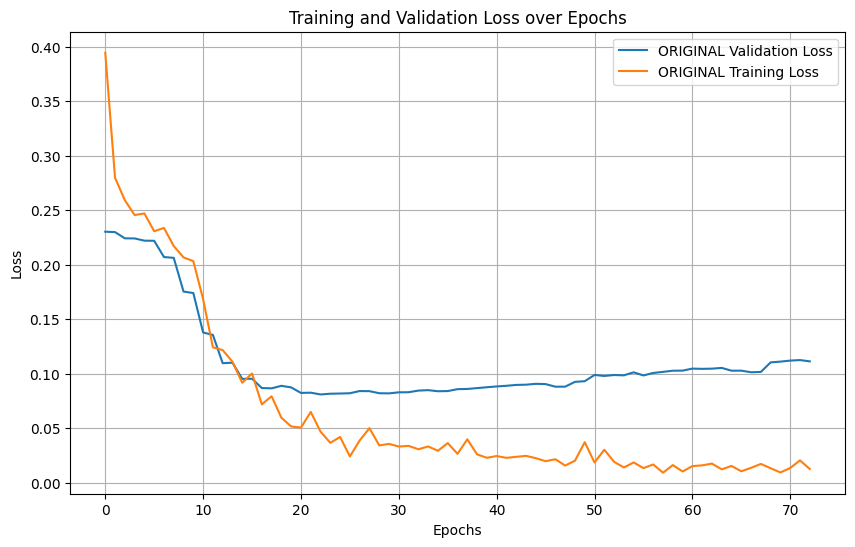

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(size_histories):
    plt.figure(figsize=(10, 6))

    # Assuming 'ORIGINAL' is the key you want to plot
    key = 'ORIGINAL'

    history = size_histories[key]
    plt.plot(history.history['val_loss'], label=f'{key} Validation Loss')
    plt.plot(history.history['loss'], label=f'{key} Training Loss')

    plt.title("Training and Validation Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(size_histories)

In [ ]:
def plot_and_save_size_histories(size_histories, filename):
    plt.figure(figsize=(10, 6))

    for key, history in size_histories.items():
        plt.plot(history.history['val_loss'], label=f'{key} Validation Loss')
        plt.plot(history.history['loss'], '--', label=f'{key} Training Loss')

    plt.title("Training and Validation Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)

    # Save the plot to a file
    plt.savefig(filename)
    plt.close()  # Close the plot to prevent displaying it if running in a loop

# Save the plot
plot_and_save_size_histories(size_histories, filename="/content/drive/MyDrive/Colab Notebooks/propaganda/predict_resuls/cnn_lstm_attention_POS_NER/augOriginal/Training and Validation Loss over Epochs.png")

# **Training and Validation Accuracy**

In [ ]:
# Check available metrics in the size_histories
for key, history in size_histories.items():
    print(f"Metrics available for {key}: {history.history.keys()}")

Metrics available for ORIGINAL: dict_keys(['accuracy', 'binary_crossentropy', 'loss', 'val_accuracy', 'val_binary_crossentropy', 'val_loss'])


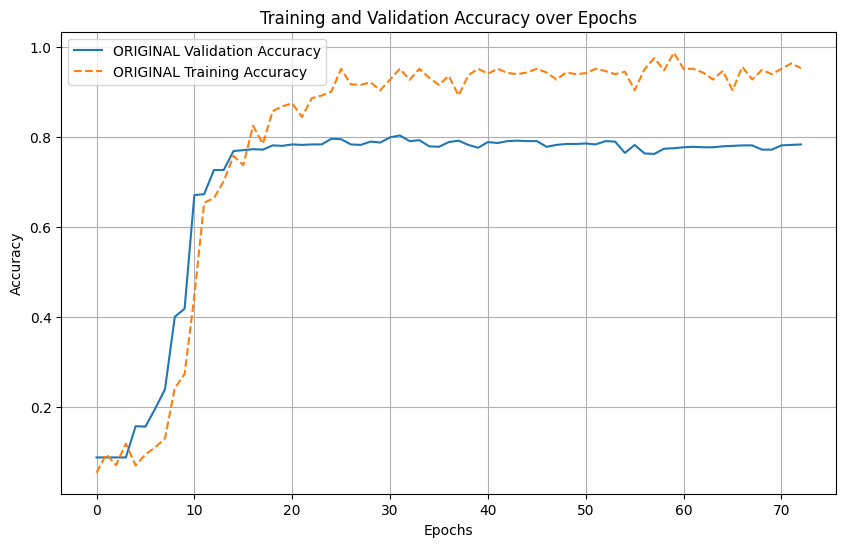

In [ ]:
# Plot training and validation accuracy
def plot_accuracy(size_histories):
    plt.figure(figsize=(10, 6))

    for key, history in size_histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{key} Validation Accuracy')
        plt.plot(history.history['accuracy'], '--', label=f'{key} Training Accuracy')

    plt.title("Training and Validation Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy(size_histories)


In [ ]:
def plot_and_save_size_histories(size_histories, filename):
    plt.figure(figsize=(10, 6))

    for key, history in size_histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{key} Validation Accuracy')
        plt.plot(history.history['accuracy'], '--', label=f'{key} Training Accuracy')

    plt.title("Training and Validation Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)


    # Save the plot to a file
    plt.savefig(filename)
    plt.close()  # Close the plot to prevent displaying it if running in a loop

# Save the plot
plot_and_save_size_histories(size_histories, filename="/content/drive/MyDrive/Colab Notebooks/propaganda/predict_resuls/cnn_lstm_attention_POS_NER/augOriginal/Training and Validation Accuracy over Epochs.png")

# Binary **Crossentropy**

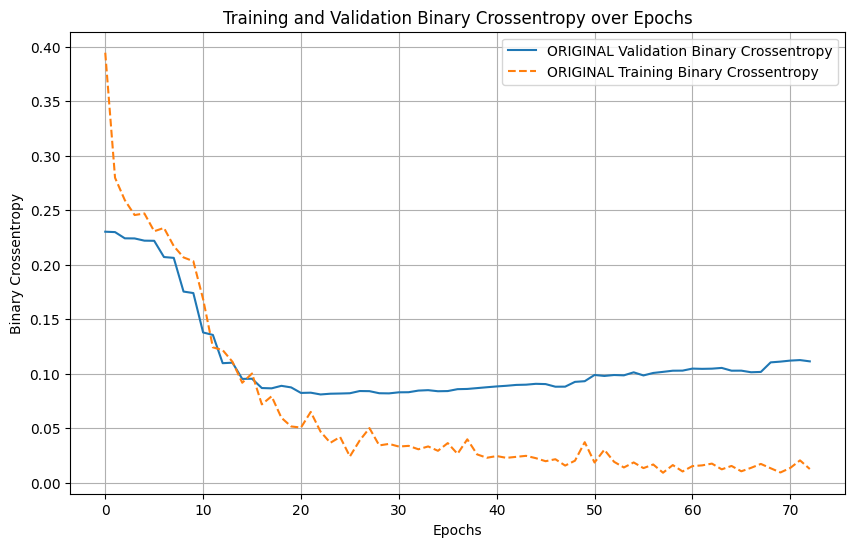

In [ ]:
# Plot training and validation binary crossentropy
def plot_binary_crossentropy(size_histories):
    plt.figure(figsize=(10, 6))

    for key, history in size_histories.items():
        plt.plot(history.history['val_binary_crossentropy'], label=f'{key} Validation Binary Crossentropy')
        plt.plot(history.history['binary_crossentropy'], '--', label=f'{key} Training Binary Crossentropy')

    plt.title("Training and Validation Binary Crossentropy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_binary_crossentropy(size_histories)

In [ ]:
def plot_and_save_size_histories(size_histories, filename):
    plt.figure(figsize=(10, 6))

    for key, history in size_histories.items():
        plt.plot(history.history['val_binary_crossentropy'], label=f'{key} Validation Binary Crossentropy')
        plt.plot(history.history['binary_crossentropy'], '--', label=f'{key} Training Binary Crossentropy')

    plt.title("Training and Validation Binary Crossentropy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()
    plt.grid(True)

    # Save the plot to a file
    plt.savefig(filename)
    plt.close()  # Close the plot to prevent displaying it if running in a loop

# Save the plot
plot_and_save_size_histories(size_histories, filename="/content/drive/MyDrive/Colab Notebooks/propaganda/predict_resuls/cnn_lstm_attention_POS_NER/augOriginal/Training and Validation Binary Crossentropy over Epochs.png")